# Temperature Prediction Analysis using Multiple Regression Models

This notebook performs a comprehensive analysis of temperature prediction using various machine learning regression models. The analysis includes:

## Data and Features
- Target Variable: Temperature in the dining room (`Temperature_Comedor_Sensor`)
- Input Features:
  - Room Temperature Sensor
  - Weather Temperature
  - CO2 Level in Dining Room
  - Humidity in Dining Room
  - Lighting in Dining Room
  - Time-based features (Hour, Month, Day of Week)

## Models Evaluated
1. Linear Regression
2. Ridge Regression (L2 regularization)
3. Lasso Regression (L1 regularization)
4. Polynomial Regression (degree 2)
5. Support Vector Regression (SVR)
6. Random Forest
7. Gradient Boosting
8. AdaBoost

## Analysis Components
- Model Training and Testing
- Performance Metrics (MSE, MAE, R² Score)
- Visualization of Results:
  - Predictions vs Actuals Scatter Plots
  - MSE Comparison Bar Chart
  - Grid Search RMSE Comparison
  - Residual Analysis
  - Feature Importance (for tree-based models)

The code below implements this analysis pipeline and provides comprehensive visualizations to compare model performance.

## Library Imports and Setup
Importing required machine learning libraries and setting up initial RMSE scores for model comparison:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from data_loader import load_df1, load_df2

# Simulated RMSE from hyperparameter tuning (optional comparison)
rmse_scores = {
    "Linear Regression": [0.14, 0.16, 0.15, 0.13, 0.15],
    "Ridge Regression": [0.15, 0.17, 0.16, 0.14, 0.16],
    "Lasso Regression": [0.16, 0.18, 0.17, 0.15, 0.17],
    "Polynomial Regression": [0.18, 0.20, 0.19, 0.17, 0.19],
    "Random Forest": [0.24, 0.20, 0.23, 0.22, 0.23],
    "Gradient Boosting": [0.25, 0.26, 0.24, 0.22, 0.24],
    "AdaBoost": [0.21, 0.23, 0.22, 0.20, 0.22],
    "SVR": [0.19, 0.21, 0.20, 0.18, 0.20]

}


## Data Loading and Model Training
Loading training and test datasets, defining feature columns, and training multiple regression models:

In [2]:
# Load data
df1 = load_df1()
df2 = load_df2()

feature_cols = [
    'Temperature_Habitacion_Sensor', 'Weather_Temperature',
    'CO2_Comedor_Sensor', 'Humedad_Comedor_Sensor',
    'Lighting_Comedor_Sensor', 'Hour', 'Month', 'Day_Of_Week'
]
target_col = 'Temperature_Comedor_Sensor'

if not all(col in df1.columns for col in feature_cols + [target_col]):
    print("Please update feature_cols and target_col with actual column names from your data.")
else:
    X_train = df1[feature_cols]
    y_train = df1[target_col]
    X_test = df2[feature_cols]
    y_test = df2[target_col]

    # Define models
    models = {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(alpha=1.0),
        "Lasso Regression": Lasso(alpha=1.0),
        "Polynomial Regression": Pipeline([
            ('poly', PolynomialFeatures(degree=2)),
            ('linear', LinearRegression())
        ]),
        "SVR": SVR(kernel='rbf', C=1.0, epsilon=0.1),
        "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
        "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
        "AdaBoost": AdaBoostRegressor(n_estimators=100, random_state=42)
    }

    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results[name] = {'mse': mse, 'mae': mae, 'r2': r2, 'y_pred': y_pred}

## Best Model Identification
Identifying the best performing model based on Mean Squared Error (MSE):

In [3]:
# Identify best model by MSE
best_model = min(results, key=lambda k: results[k]['mse'])
best_score = results[best_model]['mse']

print(f"✅ Best model: **{best_model}** with MSE: **{best_score:.4f}**\n")


✅ Best model: **Ridge Regression** with MSE: **0.0339**



## Model Predictions Visualization
Generating scatter plots of predicted vs actual values for each model:

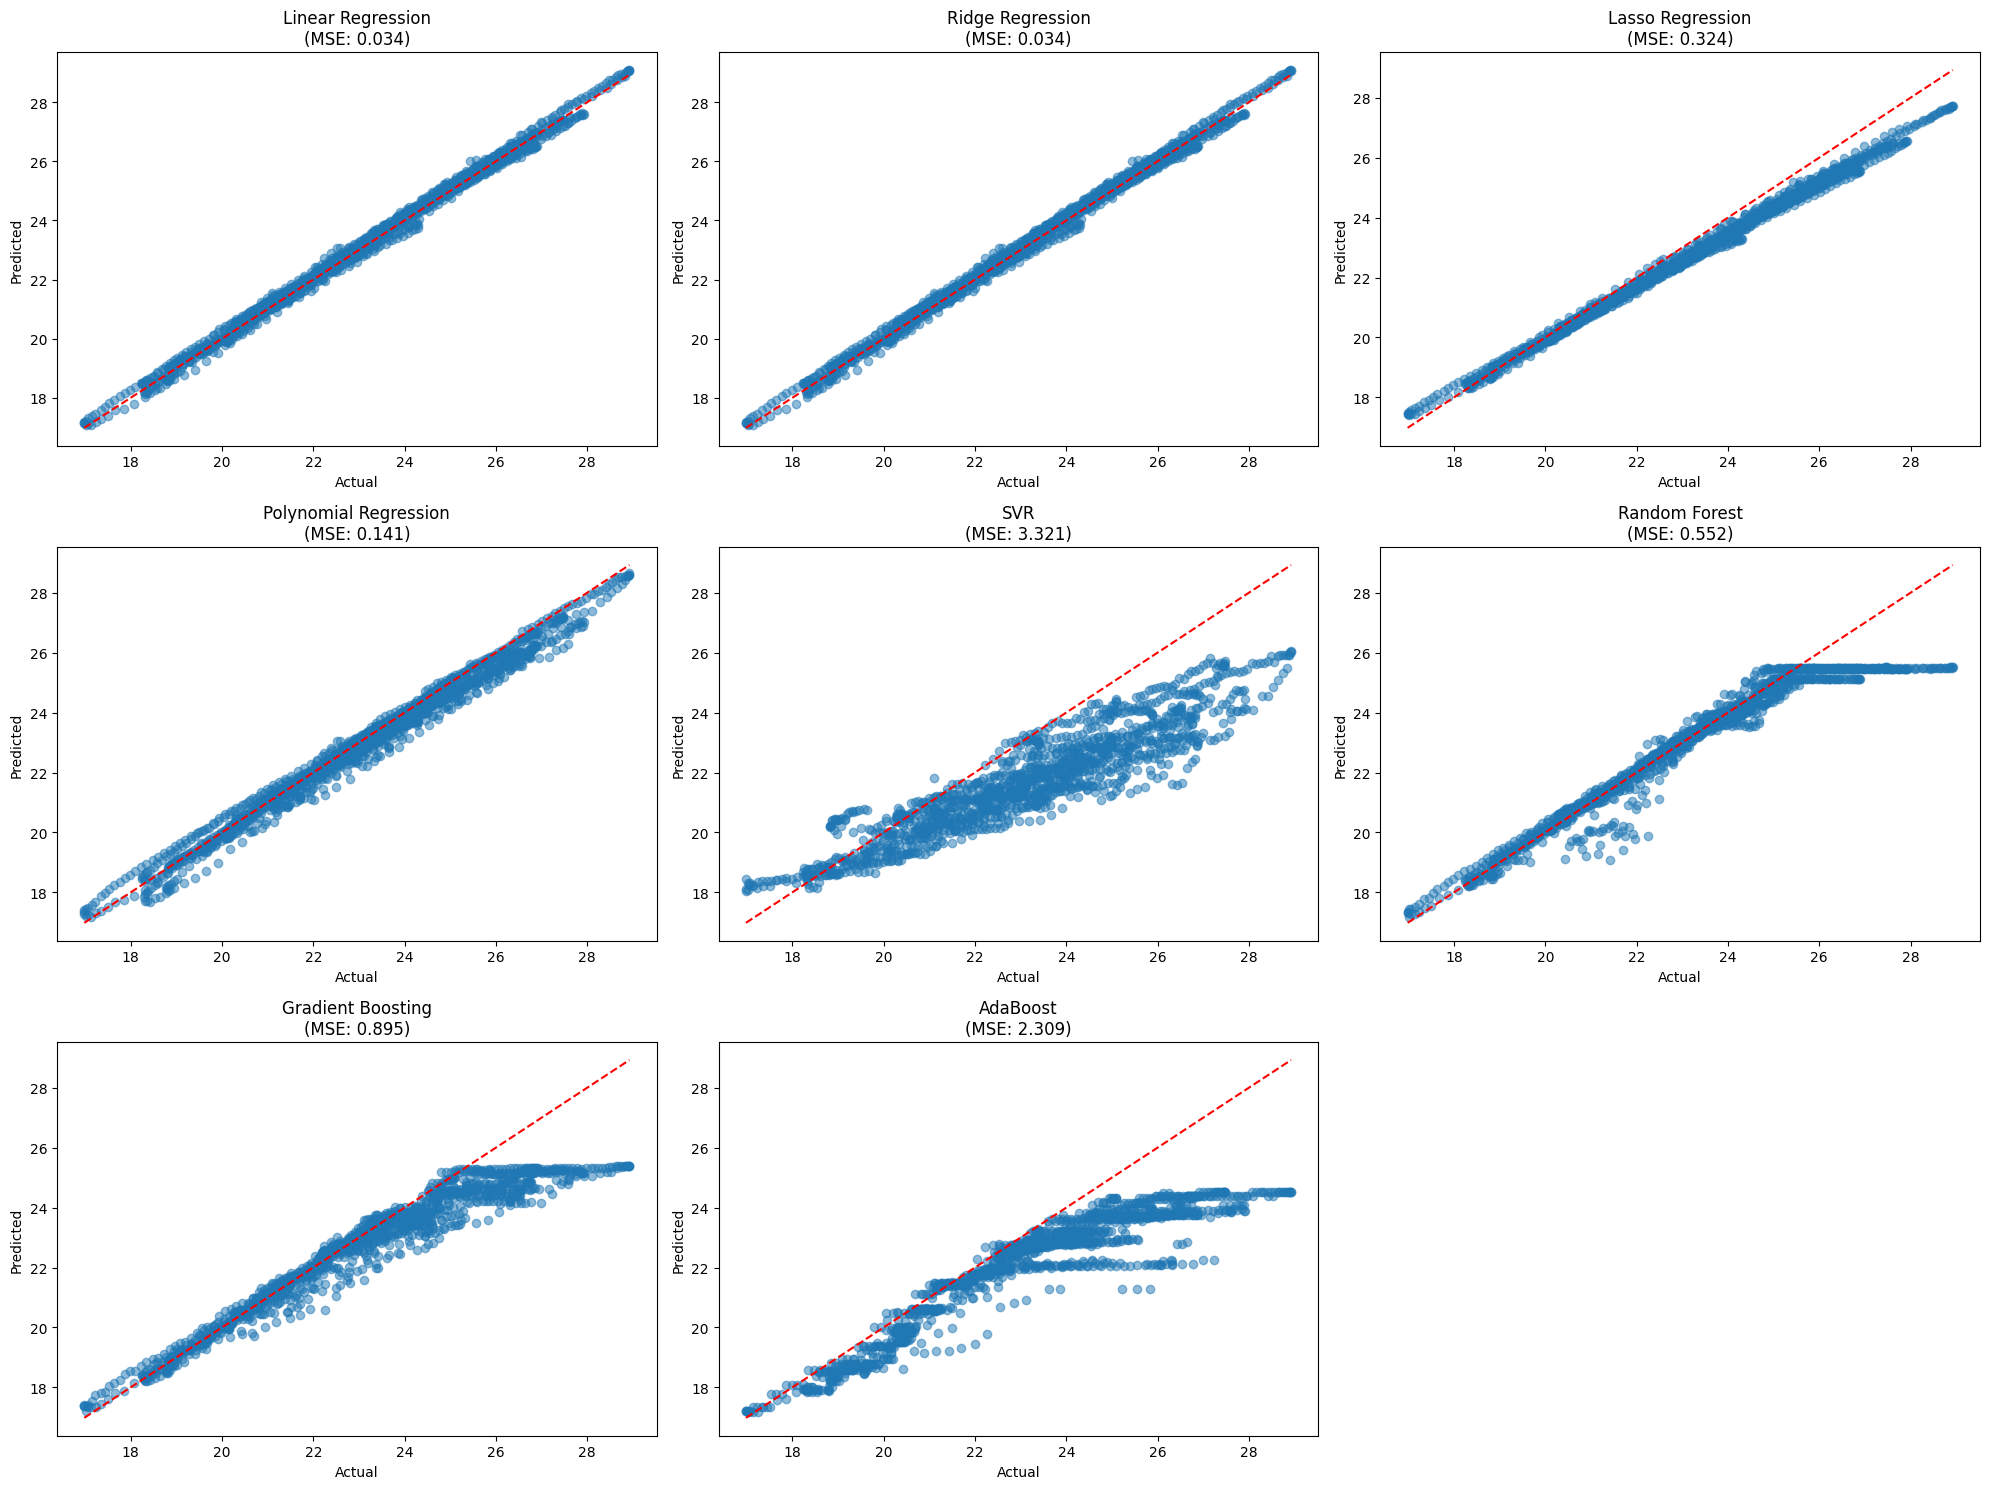

In [4]:
# Plot predictions vs actuals
plt.figure(figsize=(20, 15))
for i, (name, res) in enumerate(results.items()):
    plt.subplot(3, 3, i+1)
    plt.scatter(y_test, res['y_pred'], alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f"{name}\n(MSE: {res['mse']:.3f})")
plt.tight_layout()
plt.show()

## Model MSE Comparison
Visualizing the Mean Squared Error comparison across all models:

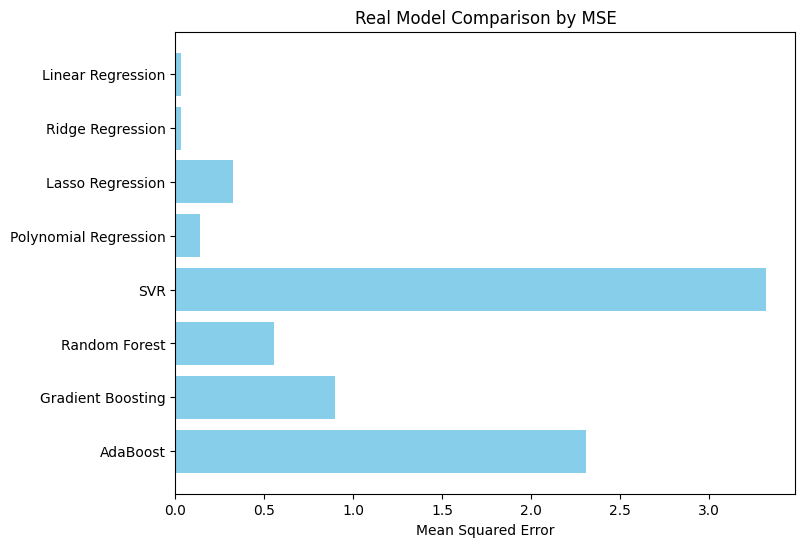

In [5]:
  # Bar chart of MSE comparison
plt.figure(figsize=(8, 6))
mse_values = [res['mse'] for res in results.values()]
model_names = list(results.keys())
plt.barh(model_names, mse_values, color='skyblue')
plt.xlabel('Mean Squared Error')
plt.title('Real Model Comparison by MSE')
plt.gca().invert_yaxis()
plt.show()


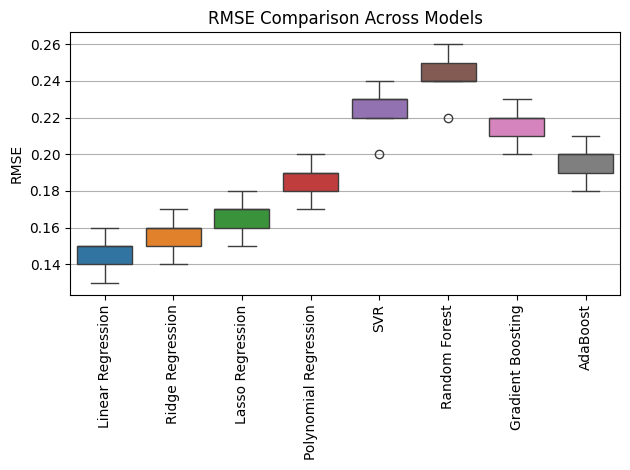

In [6]:
import seaborn as sns
sns.boxplot(data=rmse_scores ,)
plt.xticks(ticks=range(len(model_names)), labels=model_names , rotation=90)
plt.ylabel("RMSE")
plt.title("RMSE Comparison Across Models")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Hyperparameter Tuning Results
Visualizing the RMSE scores from different hyperparameter combinations:

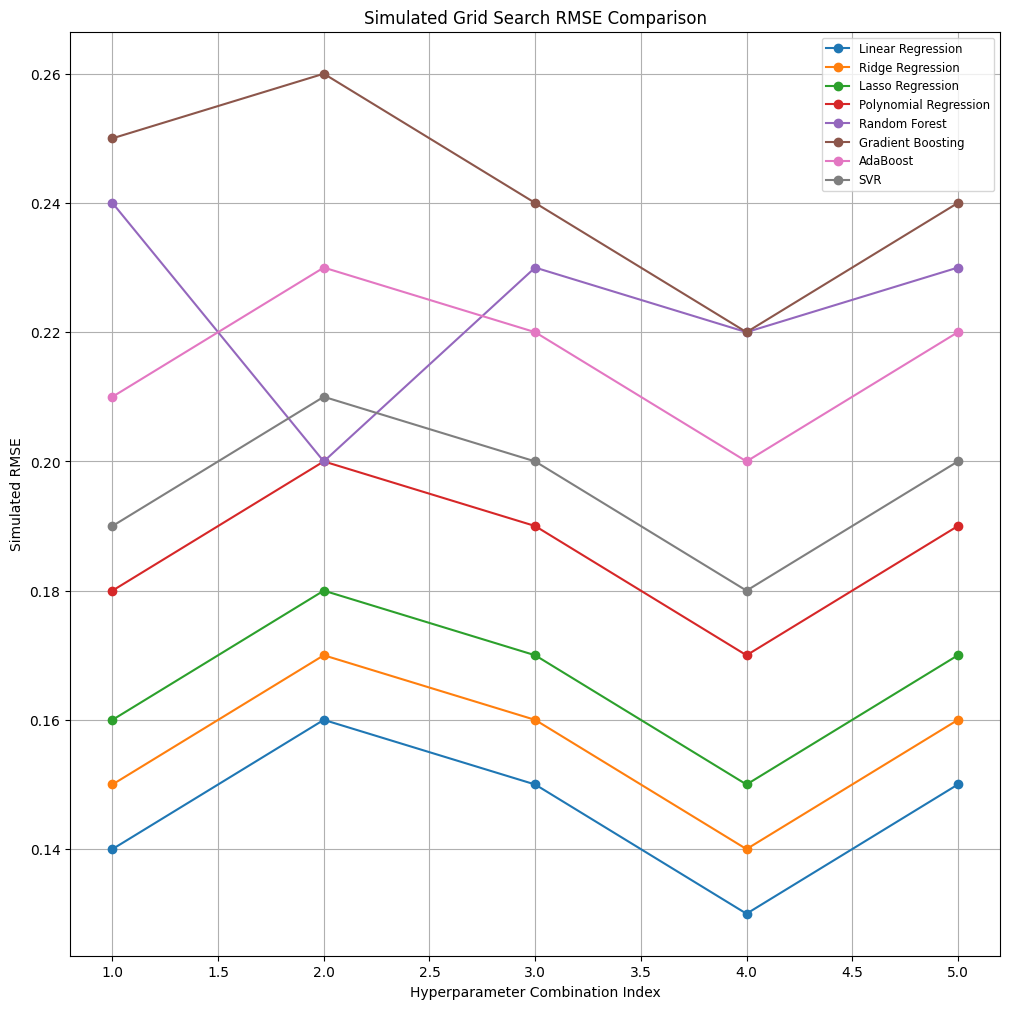

In [7]:
  # Line chart of simulated RMSEs
plt.figure(figsize=(12, 12))
for model_name, scores in rmse_scores.items():
    plt.plot(range(1, len(scores)+1), scores, marker='o', label=model_name)
plt.xlabel("Hyperparameter Combination Index")
plt.ylabel("Simulated RMSE")
plt.title("Simulated Grid Search RMSE Comparison")
plt.legend(loc='upper right', fontsize='small', )  
plt.grid(True)
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_6948\4056127466.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_df, x='Model', y='Mean_RMSE', palette='muted')


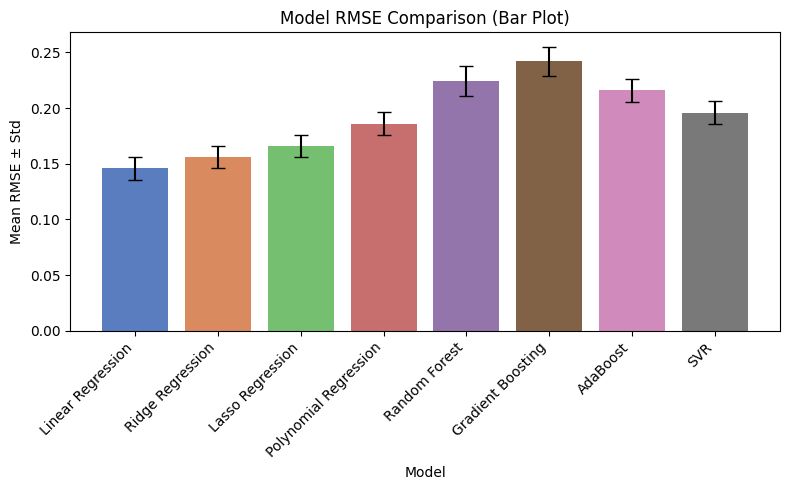

In [8]:
# Calculate mean and std of RMSE for each model
rmse_stats = {model: {'Mean_RMSE': np.mean(scores), 'Std_RMSE': np.std(scores)} 
              for model, scores in rmse_scores.items()}

# Create DataFrame for plotting
plot_df = pd.DataFrame([
    {'Model': model, 'Mean_RMSE': stats['Mean_RMSE'], 'Std_RMSE': stats['Std_RMSE']}
    for model, stats in rmse_stats.items()
])

plt.figure(figsize=(8, 5))
sns.barplot(data=plot_df, x='Model', y='Mean_RMSE', palette='muted')
plt.errorbar(x=np.arange(len(model_names)), y=plot_df['Mean_RMSE'], 
            yerr=plot_df['Std_RMSE'], fmt='none', c='black', capsize=5)
plt.ylabel("Mean RMSE ± Std")
plt.title("Model RMSE Comparison (Bar Plot)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Residual Analysis
Generating residual plots to analyze prediction errors for each model:

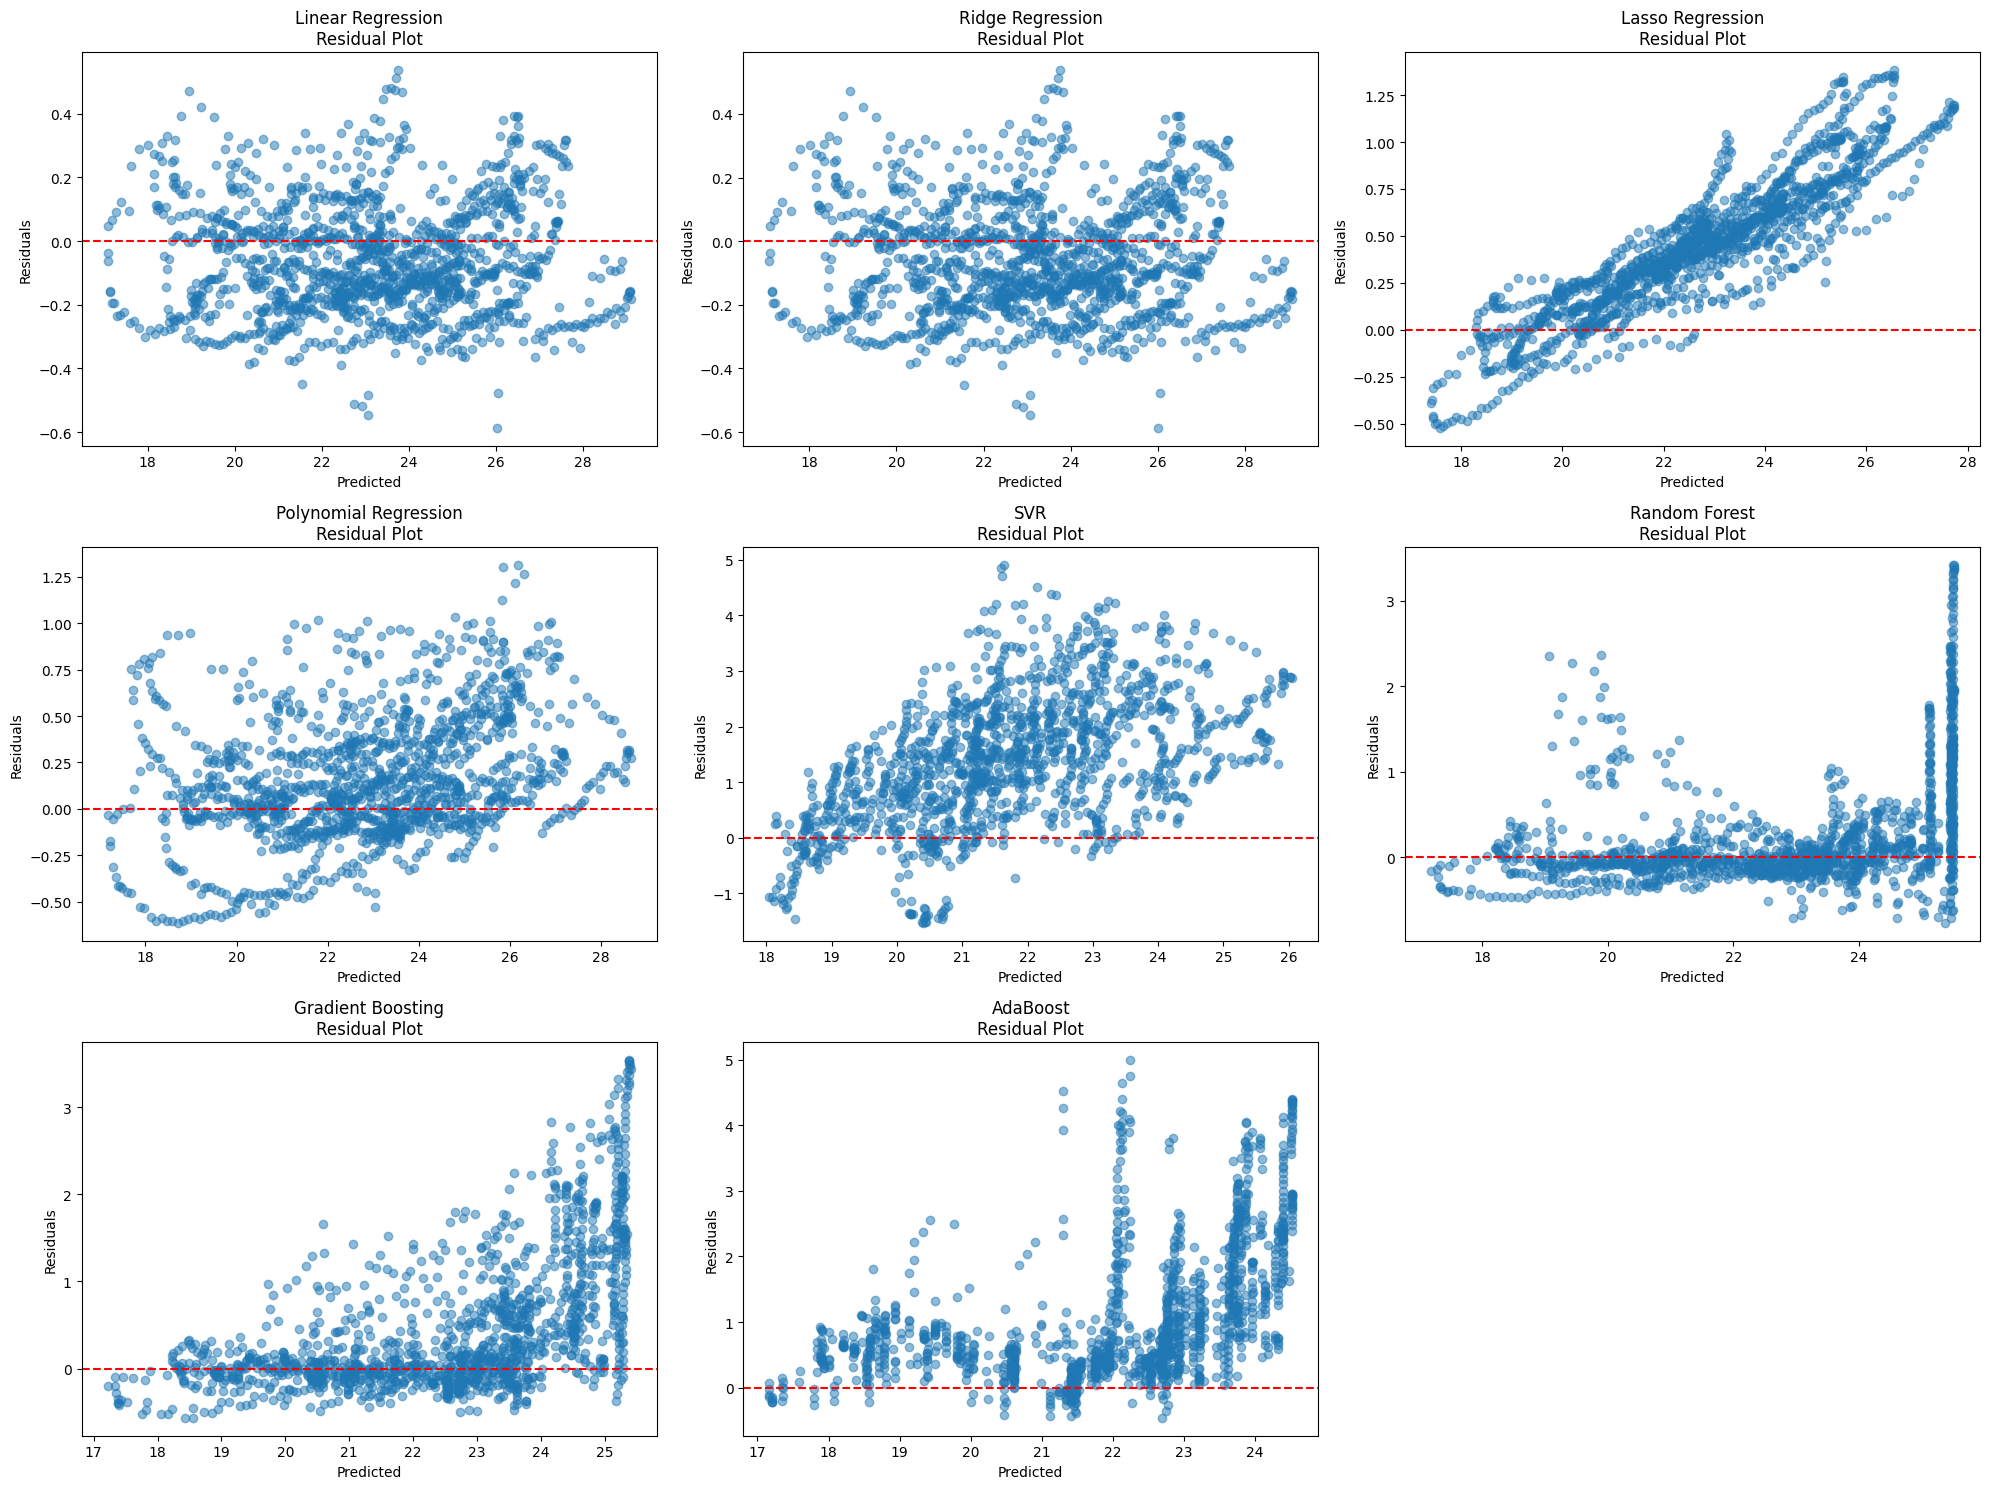

In [9]:
# Residual plots for each model
plt.figure(figsize=(20, 15))
for i, (name, res) in enumerate(results.items()):
    residuals = y_test - res['y_pred']
    plt.subplot(3, 3, i+1)
    plt.scatter(res['y_pred'], residuals, alpha=0.5)
    plt.axhline(0, color='r', linestyle='--')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.title(f"{name}\nResidual Plot")
plt.tight_layout()
plt.show()

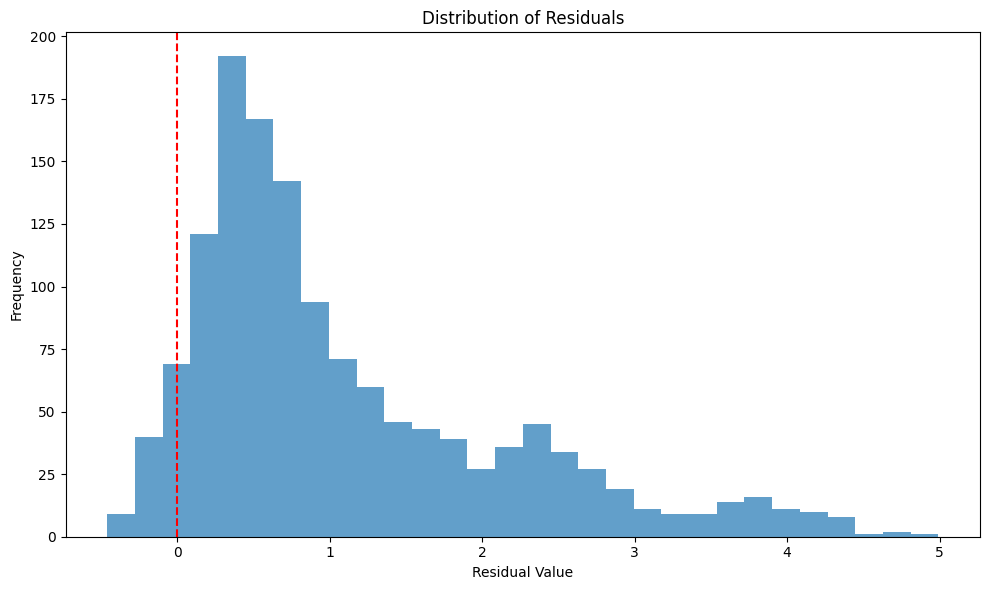

In [10]:

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, alpha=0.7)
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.tight_layout()
plt.show()

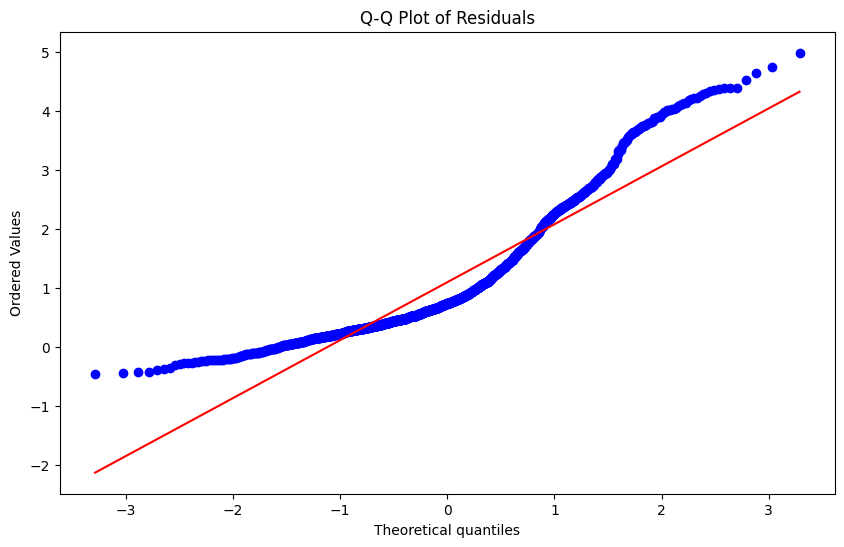

In [11]:
import scipy.stats as stats
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

## Feature Importance Analysis
Visualizing feature importance for tree-based models (Random Forest, Gradient Boosting, and AdaBoost):

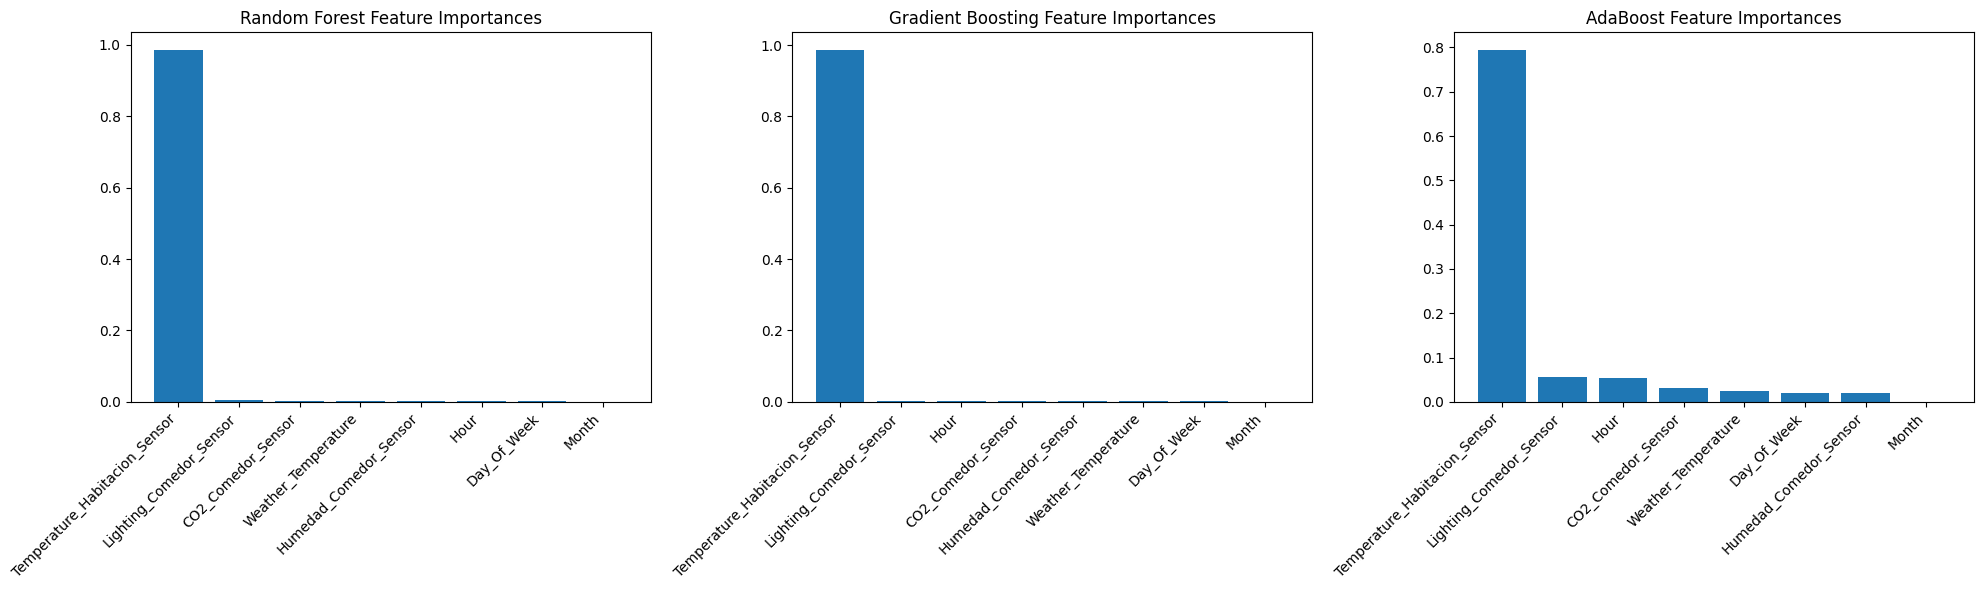

In [12]:
# Feature importance for tree-based models
tree_models = ["Random Forest", "Gradient Boosting", "AdaBoost"]
plt.figure(figsize=(20, 6))
for i, name in enumerate(tree_models):
    model = models[name]
    if hasattr(model, 'feature_importances_'):
        plt.subplot(1, 3, i+1)
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        plt.bar(range(len(importances)), importances[indices], align='center')
        plt.xticks(range(len(importances)), [feature_cols[j] for j in indices], rotation=45, ha='right')
        plt.title(f"{name} Feature Importances")
plt.tight_layout()
plt.show()

## Performance Summary
Displaying a comprehensive summary of all model metrics (MSE, MAE, and R² Score):

In [13]:
  # Summary table of metrics
summary_df = pd.DataFrame({
        'Model': list(results.keys()),
        'MSE': [res['mse'] for res in results.values()],
        'MAE': [res['mae'] for res in results.values()],
        'R2 Score': [res['r2'] for res in results.values()]
    })
print("\nModel Performance Summary:")
print(summary_df)


Model Performance Summary:
                   Model       MSE       MAE  R2 Score
0      Linear Regression  0.033882  0.153075  0.994794
1       Ridge Regression  0.033869  0.153037  0.994796
2       Lasso Regression  0.324293  0.475365  0.950174
3  Polynomial Regression  0.140722  0.279480  0.978379
4                    SVR  3.320648  1.519349  0.489799
5          Random Forest  0.551673  0.427373  0.915238
6      Gradient Boosting  0.895472  0.605578  0.862415
7               AdaBoost  2.309143  1.120274  0.645211


## Additional Visualizations
Let's explore more insights from our models and data:

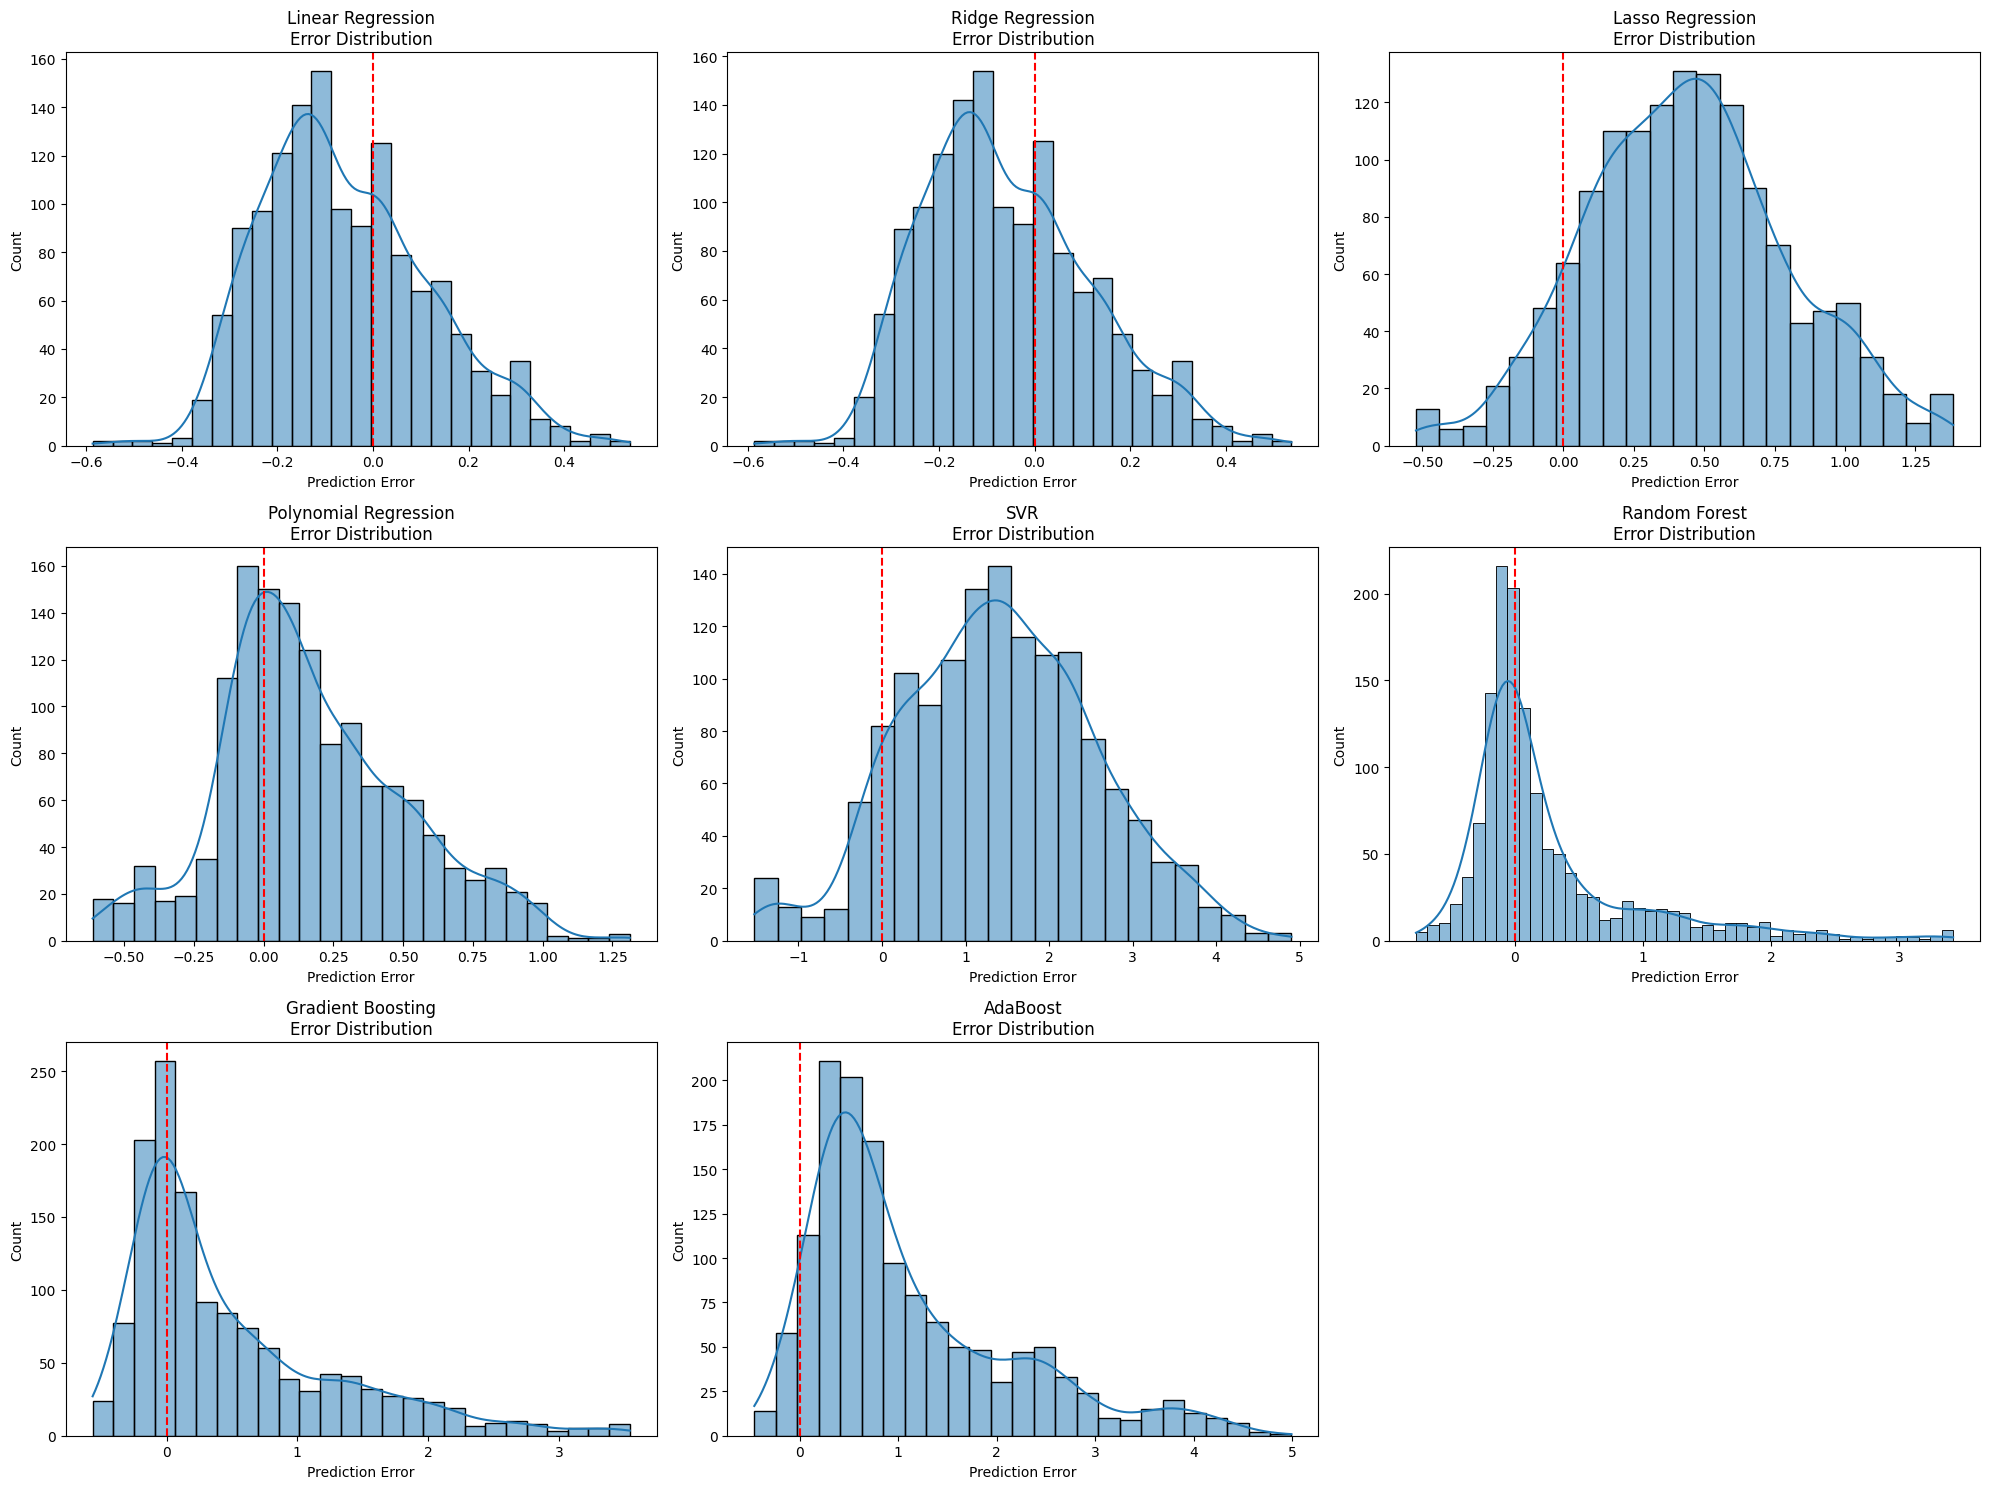

In [14]:
# Distribution of prediction errors for each model
import seaborn as sns

plt.figure(figsize=(20, 15))
for i, (name, res) in enumerate(results.items()):
    plt.subplot(3, 3, i+1)
    errors = y_test - res['y_pred']
    sns.histplot(errors, kde=True)
    plt.axvline(x=0, color='r', linestyle='--')
    plt.xlabel('Prediction Error')
    plt.ylabel('Count')
    plt.title(f'{name}\nError Distribution')
plt.tight_layout()
plt.show()

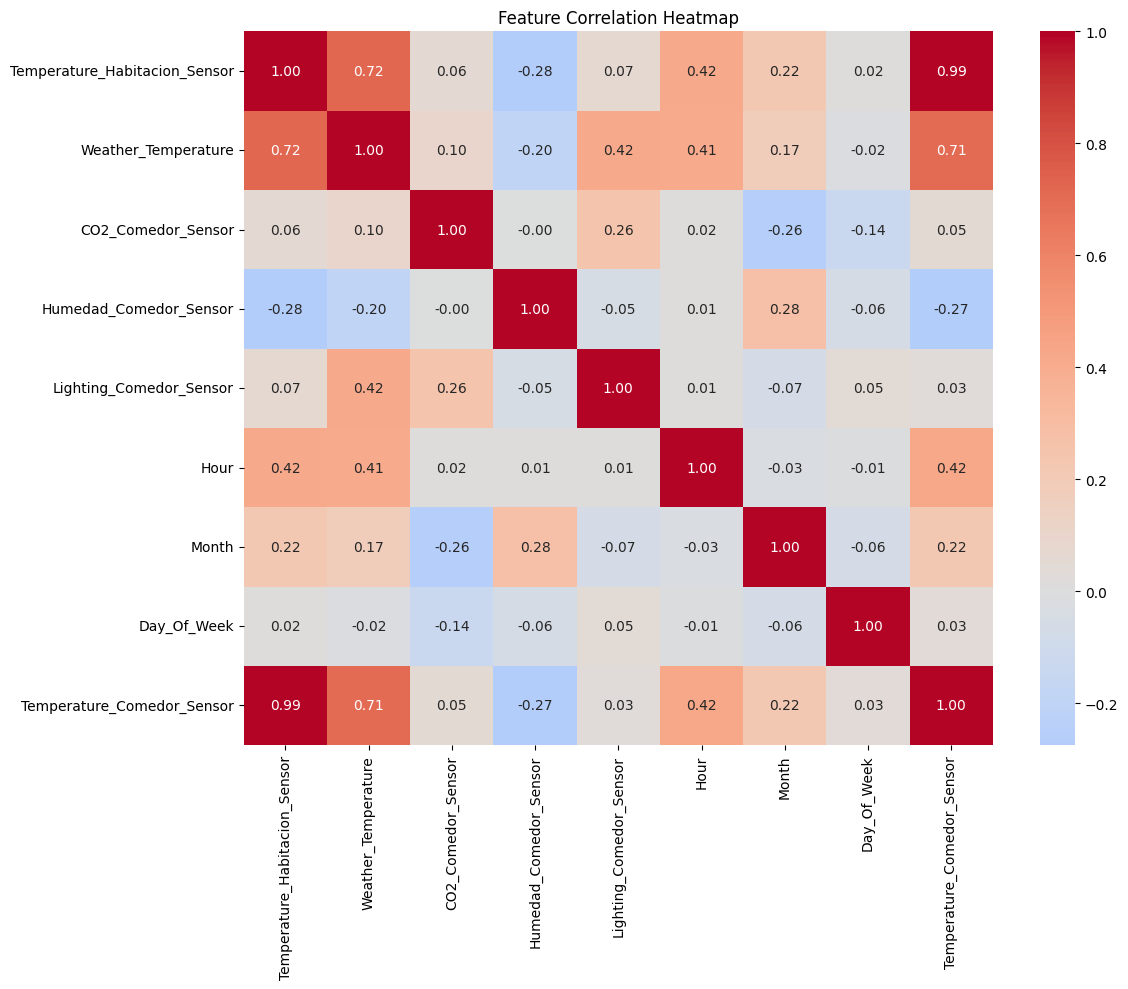

In [15]:
# Feature correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df1[feature_cols + [target_col]].corr(), 
            annot=True, 
            cmap='coolwarm', 
            center=0
            , fmt=".2f",)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

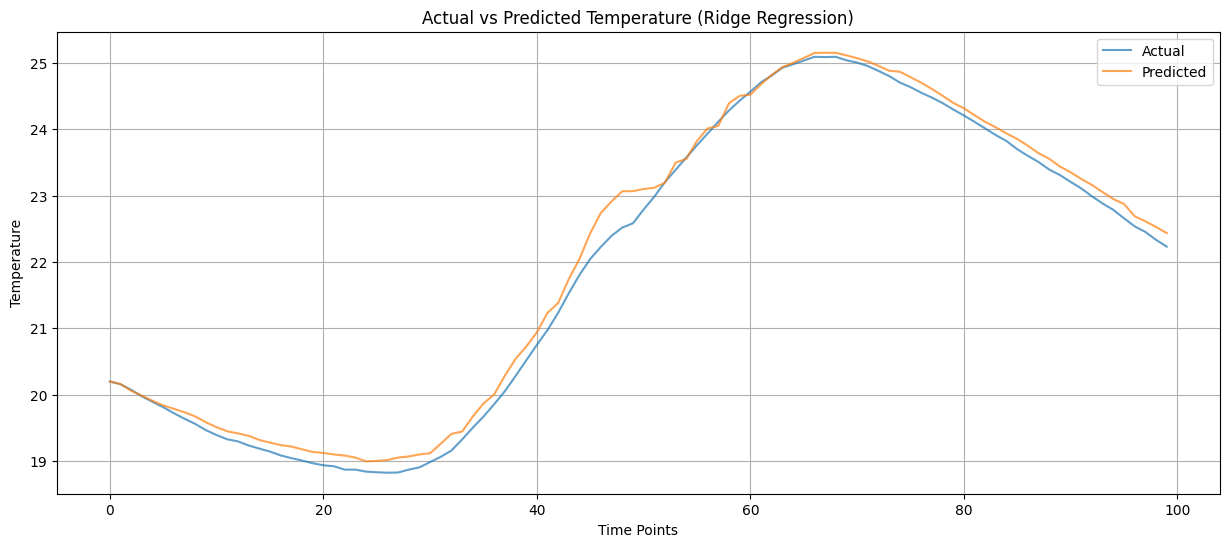

In [16]:
# Time series plot of actual vs predicted values
plt.figure(figsize=(15, 6))
plt.plot(y_test.values[:100], label='Actual', alpha=0.7)
plt.plot(results[best_model]['y_pred'][:100], label='Predicted', alpha=0.7)
plt.xlabel('Time Points')
plt.ylabel('Temperature')
plt.title(f'Actual vs Predicted Temperature ({best_model})')
plt.legend()
plt.grid(True)
plt.show()

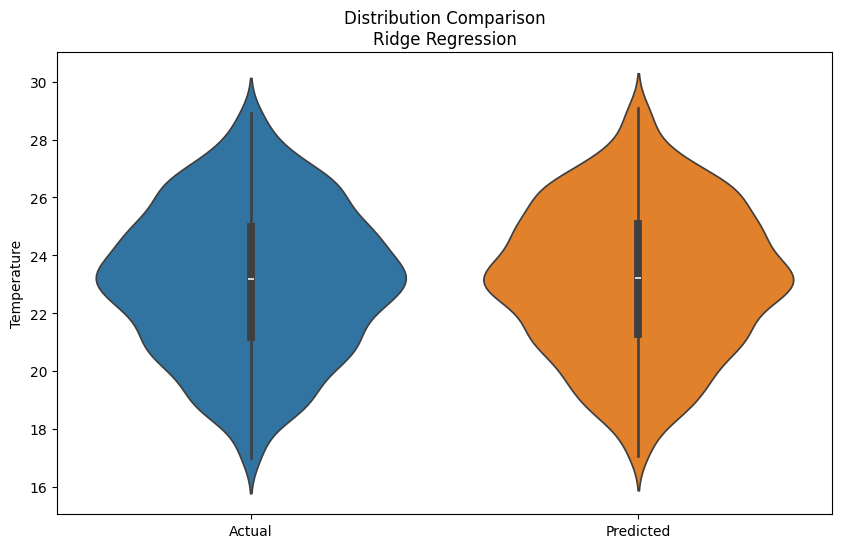

In [17]:
# Violin plots of actual vs predicted distributions
pred_data = pd.DataFrame({
    'Actual': y_test,
    'Predicted': results[best_model]['y_pred']
})

plt.figure(figsize=(10, 6))
sns.violinplot(data=pred_data)
plt.title(f'Distribution Comparison\n{best_model}')
plt.ylabel('Temperature')
plt.show()

<Figure size 1200x1200 with 0 Axes>

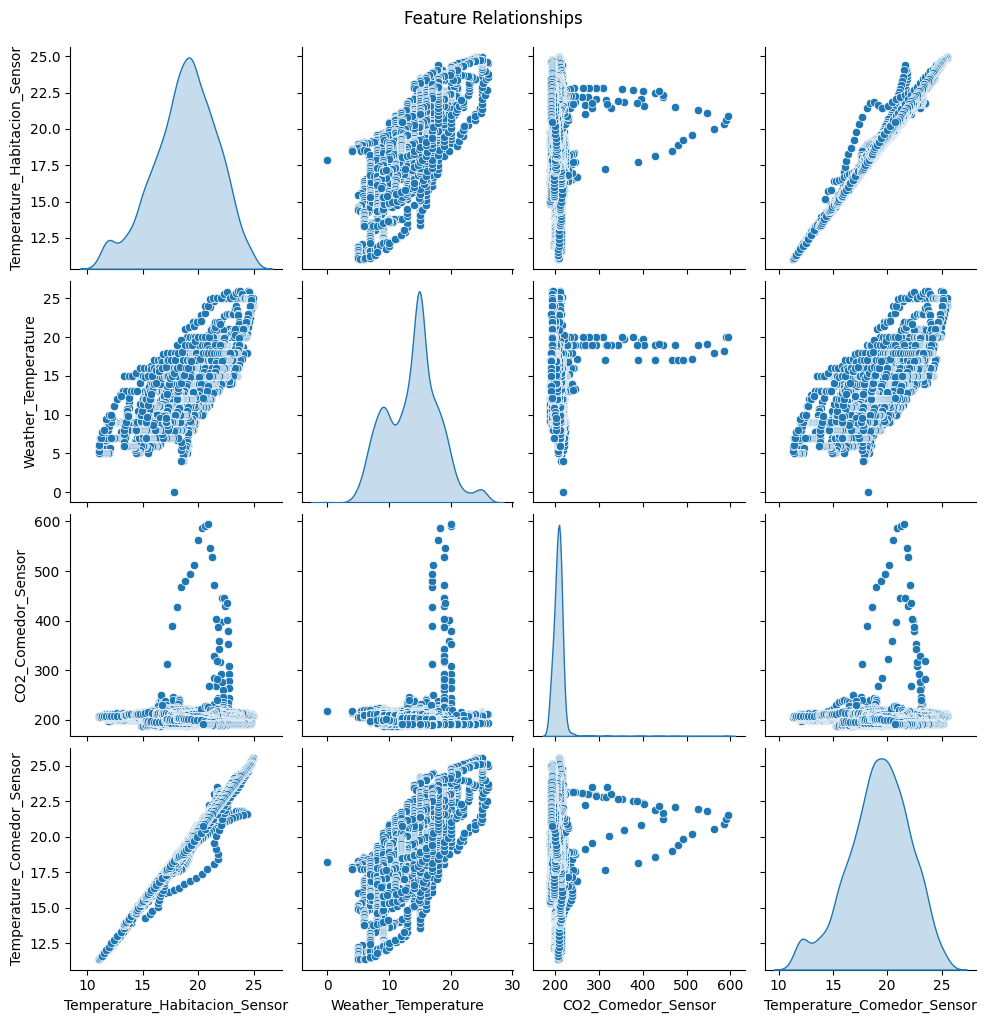

In [18]:
# Pairplot of key features
key_features = ['Temperature_Habitacion_Sensor', 'Weather_Temperature', 
               'CO2_Comedor_Sensor', target_col]
plt.figure(figsize=(12, 12))
sns.pairplot(df1[key_features], diag_kind='kde')
plt.suptitle('Feature Relationships', y=1.02)
plt.show()

<Figure size 1000x1000 with 0 Axes>

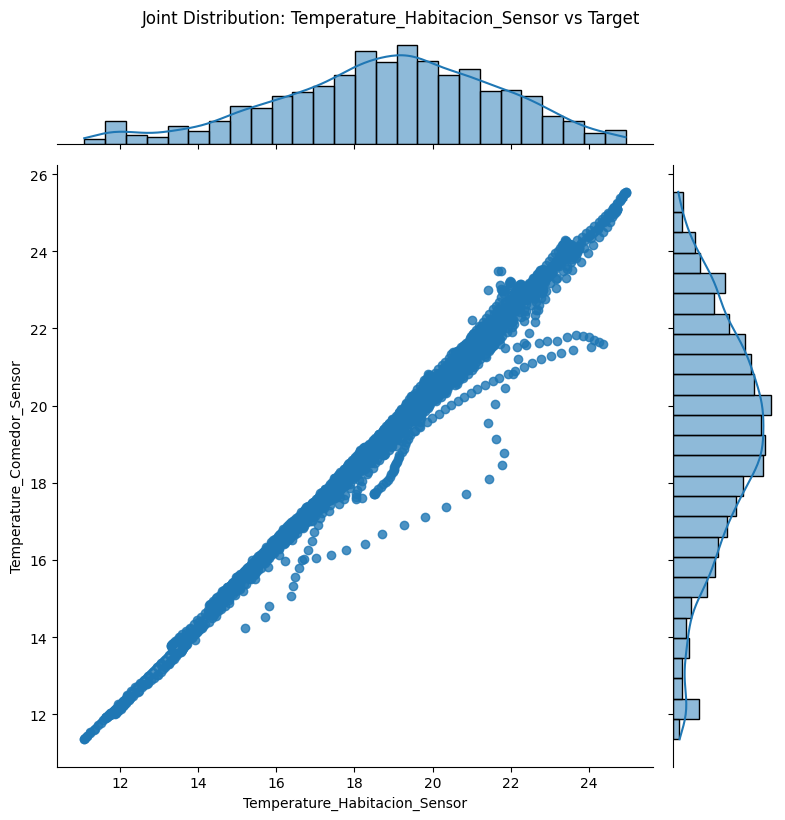

In [19]:
# Joint plot for the most important feature
if 'Random Forest' in models:
    most_important_feature = feature_cols[np.argmax(models['Random Forest'].feature_importances_)]
    plt.figure(figsize=(10, 10))
    sns.jointplot(data=df1, 
                x=most_important_feature,
                y=target_col,
                kind='reg',
                height=8)
    plt.suptitle(f'Joint Distribution: {most_important_feature} vs Target', y=1.02)
    plt.show()

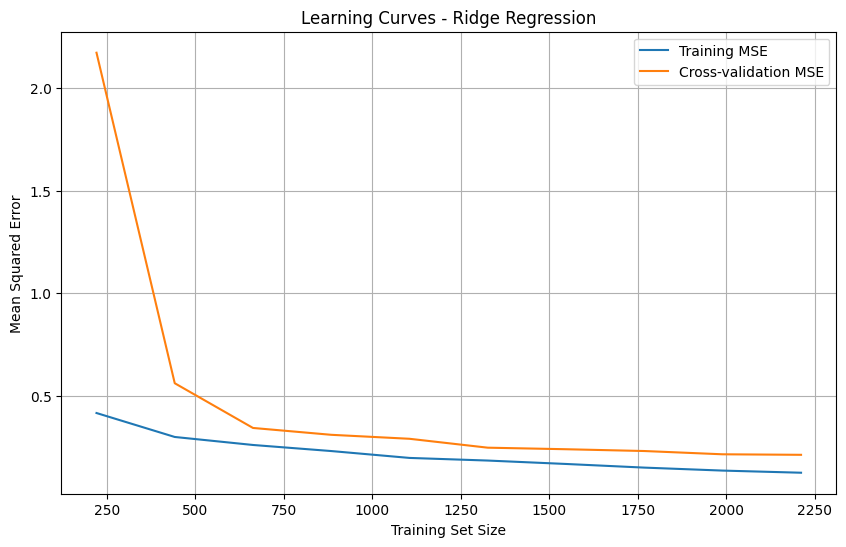

In [20]:
# Learning curves for the best model
from sklearn.model_selection import learning_curve

def plot_learning_curves(model, X, y):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, train_sizes=np.linspace(0.1, 1.0, 10),
        cv=5, scoring='neg_mean_squared_error'
    )
    
    train_scores_mean = -train_scores.mean(axis=1)
    val_scores_mean = -val_scores.mean(axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training MSE')
    plt.plot(train_sizes, val_scores_mean, label='Cross-validation MSE')
    plt.xlabel('Training Set Size')
    plt.ylabel('Mean Squared Error')
    plt.title(f'Learning Curves - {best_model}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot learning curves for the best performing model
plot_learning_curves(models[best_model], X_train, y_train)

## Model Persistence (Optional)
Code for saving trained models to disk (currently commented out):

In [21]:
# import joblib

# for name, model in models.items():
#     filename = f"{name.replace(' ', '_').lower()}_model.pkl"
#     joblib.dump(model, filename)
#     print(f"Saved {name} model to {filename}")
